# *Анализ оттока клиентов*

**Материалы:**

Презентация - https://disk.yandex.ru/i/ExEJGuUrG2TKLw

Дашборд - https://public.tableau.com/app/profile/dnale/viz/_16529805336790/Dashboard1?publish=yes

# Задача:


 **Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.**

План:

 1.   Загрузка и предобработка данных.

 2.   Исследовательский анализ данных:

       - Категоризация по возрасту и заработной платы.

       - Распредление

       - Кореляционный анализ

       - баллов кредитного скоринга

       - пола

       - возраста

       - количества продуктов, которыми пользуется клиент

       - наличия кредитной карты

       - уровня заработной платы клиента

 3.   Формулировка и проверка статистических гипотез.
 
 4.   Кластеризация

 4.   Выделение портрета клиентов, которые склонны уходить из банка:
 
 5.   Выводы и рекомендации.

 6.   Презентация



## Загрузка данных и предобработка.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pprint
from pymystem3 import Mystem
from collections import Counter



from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy import stats as st
import scipy.stats as stats

import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
sns.set(rc={'figure.figsize':(16, 9)})

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    raise


data.columns = data.columns.str.lower()

dt = [data]
for df in dt:   
    print('Первые 5 строк датафрейма')
    print('-'*80)
    display(data.head(5))
    print('-'*80)
    print('Размер датафрейма: (строк:столбцов) {}'.format(data.shape))
    print('-'*80)
    print('Типы данных и общая информация')
    print(data.info())
    print('-'*80)
    print('Наличие дубликатов: {}'.format(data.duplicated().sum()))
    print('-'*80)
    print('Наличие пропусков')
    print('-'*80)
    print(data.isna().sum())
    print('Стат данные')
    print('-'*80)
    display(data.describe().T)


Первые 5 строк датафрейма
--------------------------------------------------------------------------------


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


--------------------------------------------------------------------------------
Размер датафрейма: (строк:столбцов) (10000, 12)
--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  i

,count,mean,std,min,25%,50%,75%,max
userid,"10,000.00","15,733,676.57","71,936.19","15,608,437.00","15,671,264.25","15,733,474.00","15,795,969.75","15,858,426.00"
score,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,"6,383.00","119,827.49","30,095.06","3,768.69","100,181.98","119,839.69","139,512.29","250,898.09"
products,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
creditcard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
churn,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


1. Средний балл кредитного скоринга - 650

2. Средний возраст клиентов - 39 лет

3. Среднее количество объектов в собствености - 5

4. Средний баланс на счетах - 119,827

5. Среднее количество продуктов, которыми пользуются клиенты - 1,5

6. Порядка 70% пользуются кредитными картами

7. Активность клиентов порядка 50%

8. Средняя зарплата - 100,090

9. Доля оттка - 20%

Вывод:

1. Названия столбцов приведены к нижнему регистру.

2. Типы данных корректны.

3. Дубликатов нет.

4. Есть пропуски в столбце balance. Обработать их нет возможности так как мы не знавем какими именно продуктами банка пользуются клиенты и не можем определить причину наличия пропусков. Обработка пропусков может привести к искажению общей картины.

5. Данные готовы к исследованию.

## Исследовательский анализ.

### Категоризация.

In [3]:
def age_group(age):
    if age <= 28:
        return 'Молодёж'
    if age <= 45:
        return 'Средний возраст'
    if age <= 65:
        return 'Выше среднего'
    return 'Песионеры'

data['age_group'] = data['age'].apply(age_group)

def salary_group(estimated_salary):
    if estimated_salary <= 30000:
        return 'Низкая з/п'
    if estimated_salary <= 60000:
        return 'Средняя з/п'
    if estimated_salary <= 100000:
        return 'З/п выше среднего'
    return 'Высокая з/п'

data['salary_group'] = data['estimated_salary'].apply(salary_group)
data.head() 

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_group,salary_group
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1,Средний возраст,Высокая з/п
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,Средний возраст,Высокая з/п
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,Средний возраст,Высокая з/п
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0,Средний возраст,З/п выше среднего
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0,Средний возраст,З/п выше среднего


In [4]:
print('Отток:')
display(data[data['churn']==1].describe().T)
print('\nОставшиеся клиенты:')
display(data[data['churn']==0].describe().T)

Отток:


,count,mean,std,min,25%,50%,75%,max
userid,"2,037.00","15,732,787.96","72,692.62","15,608,442.00","15,670,096.00","15,731,699.00","15,795,828.00","15,858,392.00"
score,"2,037.00",645.35,100.32,350.00,578.00,646.00,716.00,850.00
age,"2,037.00",44.84,9.76,18.00,38.00,45.00,51.00,84.00
objects,"2,037.00",4.93,2.94,0.00,2.00,5.00,8.00,10.00
balance,"1,537.00","120,746.97","30,555.19","3,768.69","103,700.69","119,948.09","137,986.58","250,898.09"
products,"2,037.00",1.48,0.80,1.00,1.00,1.00,2.00,4.00
creditcard,"2,037.00",0.70,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,"2,037.00",0.36,0.48,0.00,0.00,0.00,1.00,1.00
estimated_salary,"2,037.00","101,465.68","57,912.42",11.58,"51,907.72","102,460.84","152,422.91","199,808.10"
churn,"2,037.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00



Оставшиеся клиенты:


,count,mean,std,min,25%,50%,75%,max
userid,"7,963.00","15,733,903.88","71,744.23","15,608,437.00","15,671,554.50","15,734,279.00","15,796,088.50","15,858,426.00"
score,"7,963.00",651.85,95.65,405.00,585.00,653.00,718.00,850.00
age,"7,963.00",37.41,10.13,18.00,31.00,36.00,41.00,92.00
objects,"7,963.00",5.03,2.88,0.00,3.00,5.00,7.00,10.00
balance,"4,846.00","119,535.86","29,944.93","14,262.80","99,118.23","119,791.21","139,747.40","221,532.80"
products,"7,963.00",1.54,0.51,1.00,1.00,2.00,2.00,3.00
creditcard,"7,963.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,"7,963.00",0.55,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"7,963.00","99,738.39","57,405.59",90.07,"50,783.49","99,645.04","148,609.96","199,992.48"
churn,"7,963.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


1. У клиентов из оттока баллы кредитного скоринга чуть ниже

2. У клиентов из оттока средний возраст выше

3. У клиентов из оттока количество объектов в собствености меньше

4. Баланс на счету почти не отличается

5. Количество продуктов, которыми пользуются клиенты почти не отличается

6. Процент пользования кредитными картами одинаковый

7. У клиентов из оттока активность ниже

8. У клиентов из оттока средний уровень зарплаты чуть выше


###  Столбчатые гистограммы и распределения признаков по группам: "кто ушёл" и "кто остался"

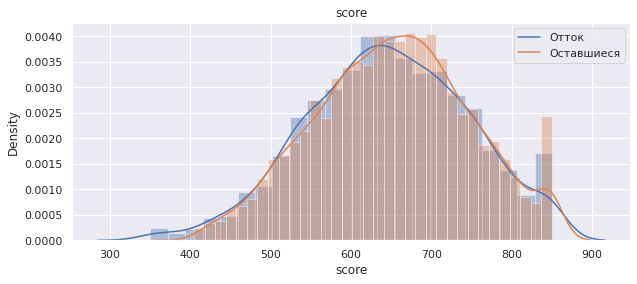

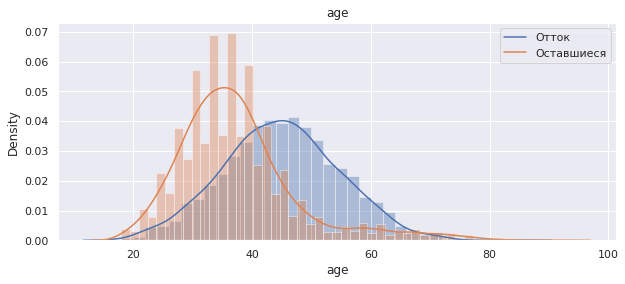

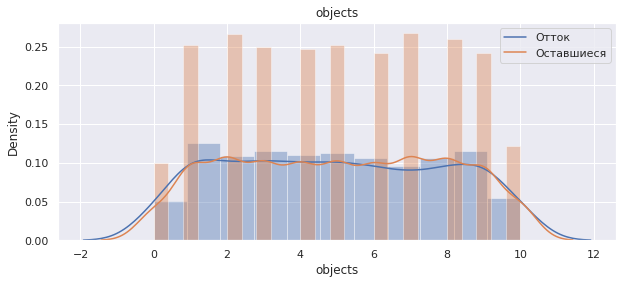

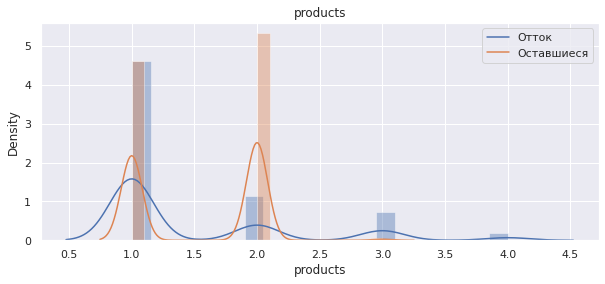

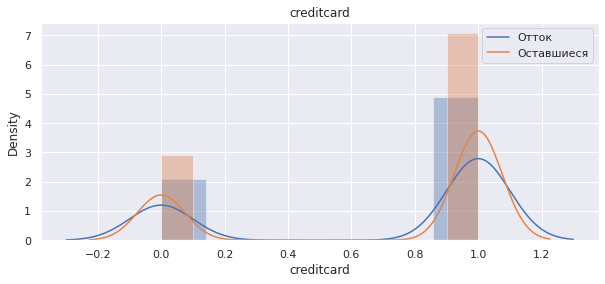

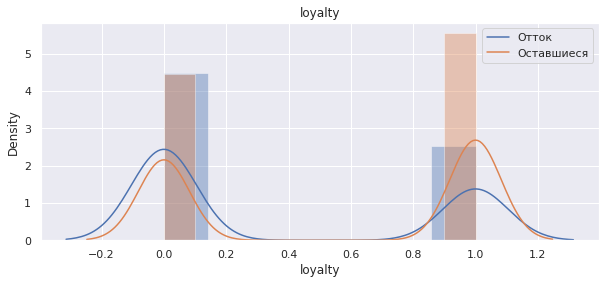

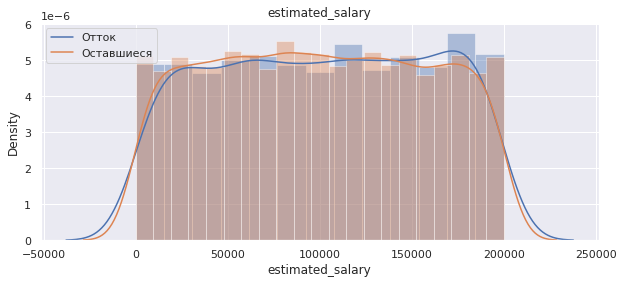

In [5]:
left = data[data['churn']==1]
stayed = data[data['churn']==0]
distplot_columns = ['score', 'age', 'objects', 'products', 'creditcard', 'loyalty', 'estimated_salary']
for column in distplot_columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stayed[column])
  plt.legend(['Отток', 'Оставшиеся'])
  plt.show()

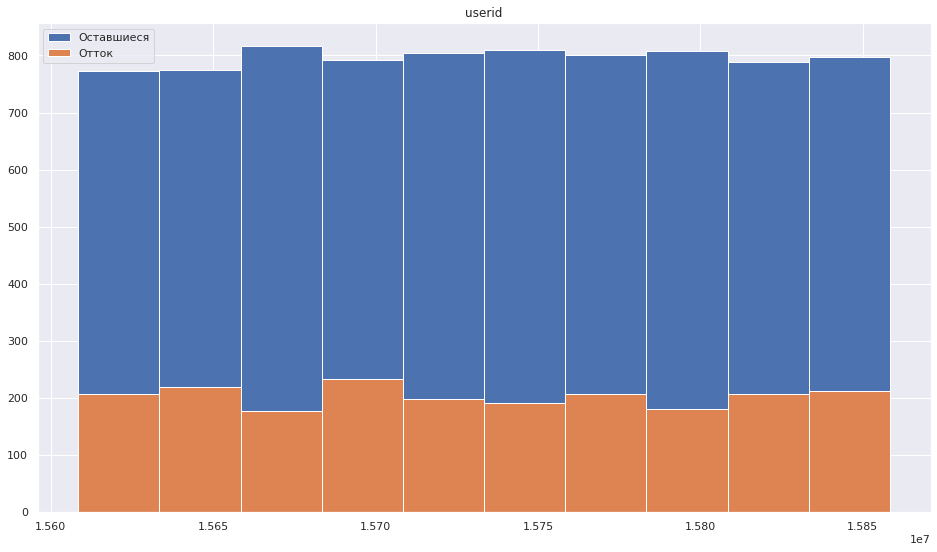

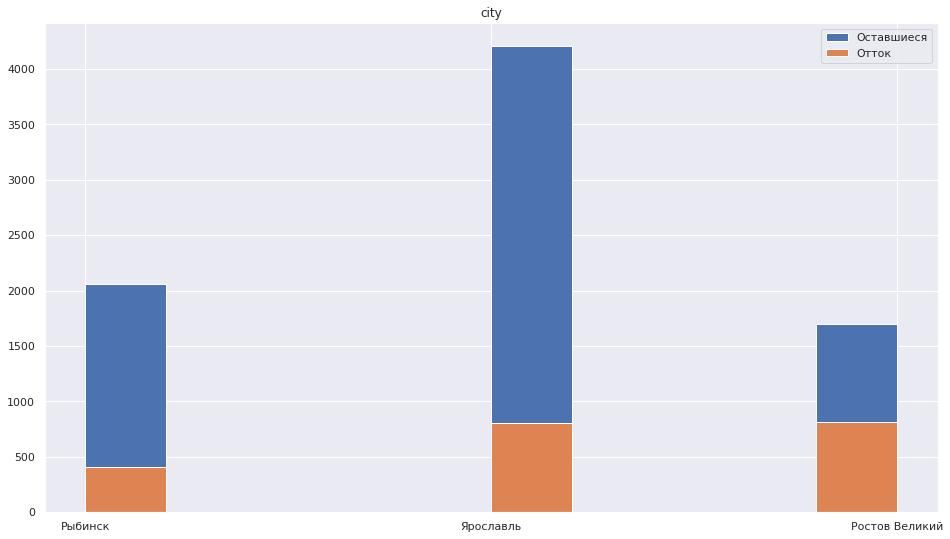

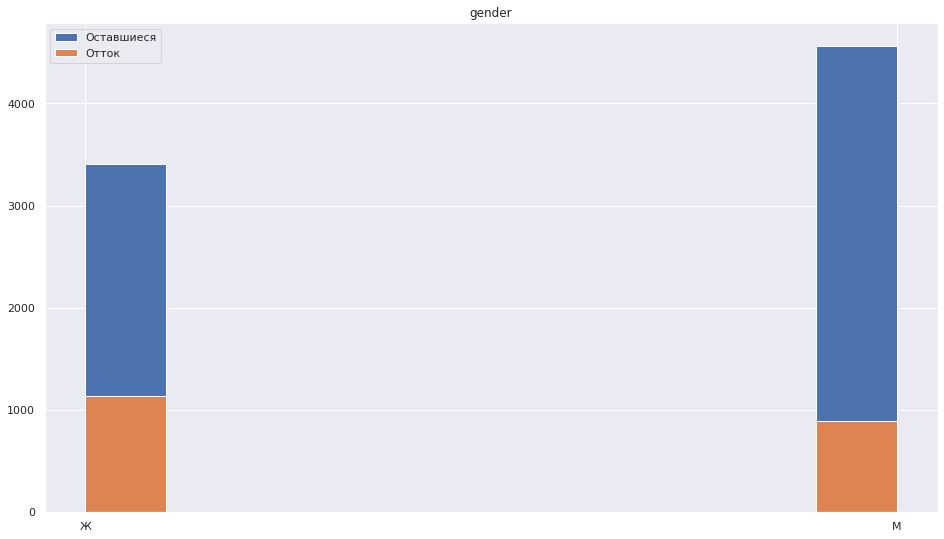

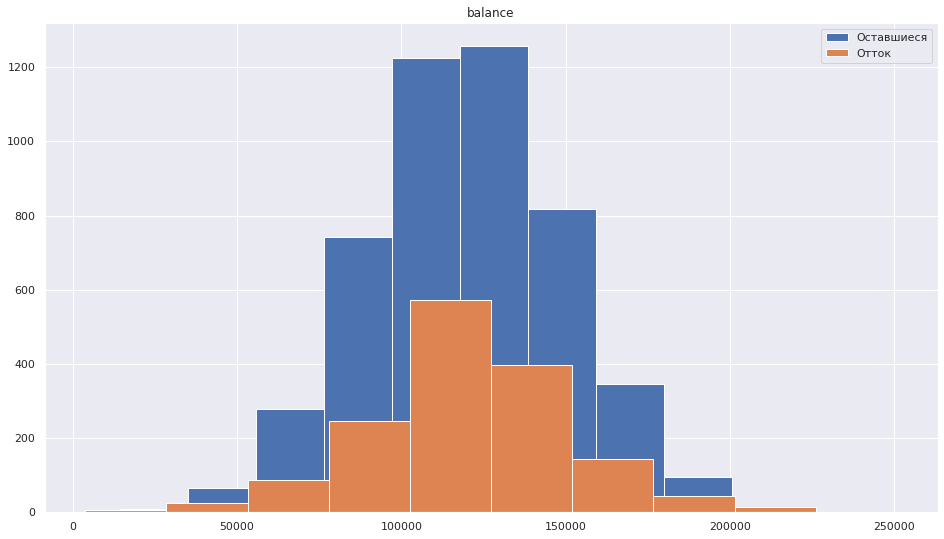

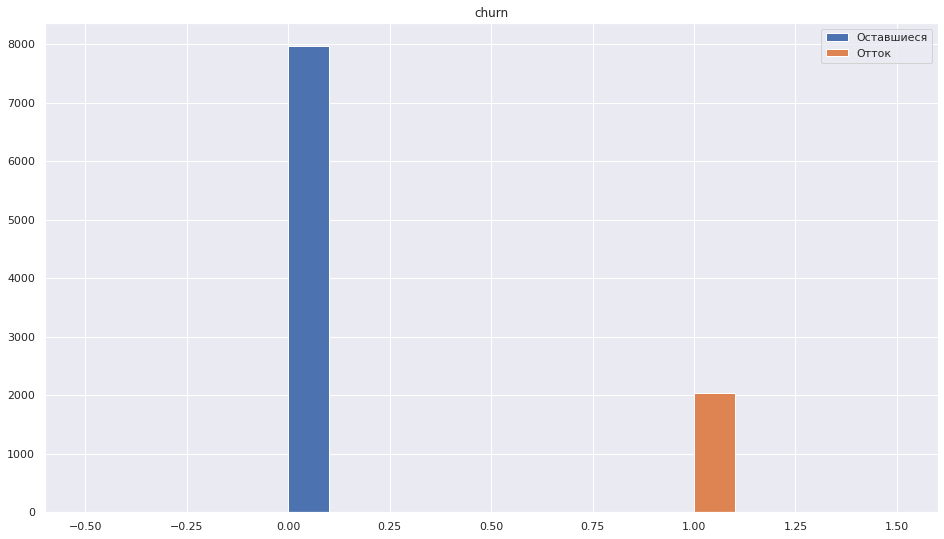

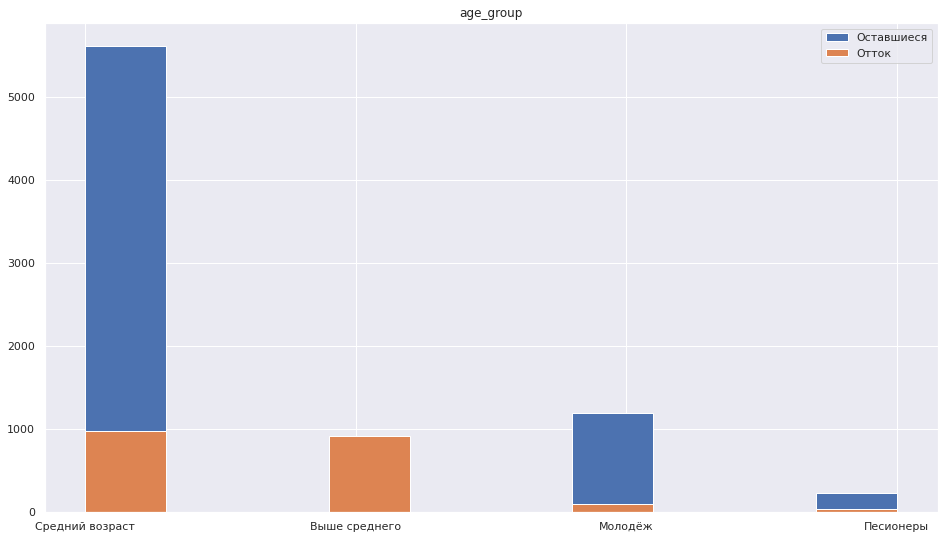

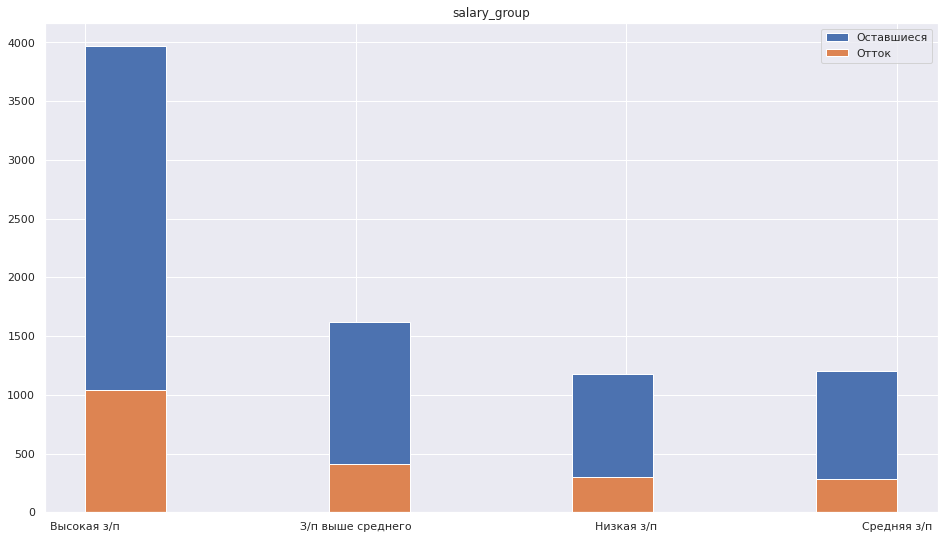

In [6]:
for column in data.columns:
  if column not in distplot_columns:
    data.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

    1. Распределение по признакам похоже на нормальное.
    
    2. Процент оттока в Ростове Великом выше чкм в Рыбинске и Ярославле.
    
    3. Процент оттока у женщин выше чем у мужчин.
    
    4. Самый высокий процент оттока у клиентов имеющих баланс в диапазоне 100000 - 125000.
    
    5. В возрастном диапозоне "выше среднего"(45-65) практически нет оставшихся клиентов.
    
    6. Больше всего клиентов с высокой заработной платой, но и процент оттока у них выше.

### Матрица корреляции

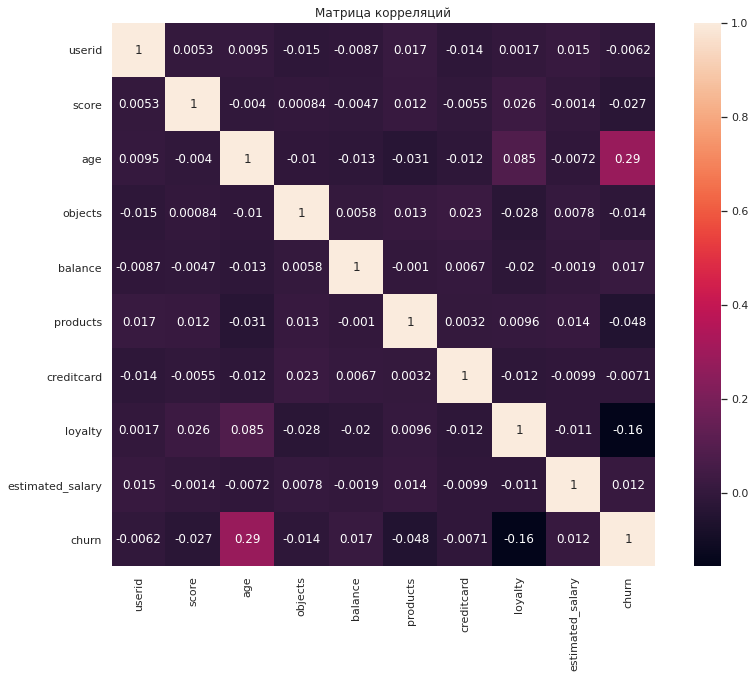

In [7]:
cm = data.corr() 
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

Вывод: Явной зависимости факта оттока от признаков не обнаружено

 Все коэффициенты корреляци находятся в деипазоне до 0.3. По шкале Чеддока это показывает, что связь слабая.

## Формулировка и проверка статистических гипотез

### Гипотеза - различие дохода групп "кто остался" и "кто ушёл" 

H0 - доходы групп равны.  Н1 - доходы не равны

In [8]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data.query('churn == 0')['estimated_salary'], data.query('churn == 1')['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22644042802223346
Не получилось отвергнуть нулевую гипотезу


Отсутствуют статистически значимые различия средних значений доходов клиентов, которые остались и теми кто ушёл.

### Гипотеза - различие баллов кредитного скоринга групп "кто остался" и "кто ушёл"

Н0 - баллы кредитного скоринга равны. Н1 - баллы не равны.

In [9]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data.query('churn == 0')['score'], data.query('churn == 1')['score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.006738213892192373
Отвергаем нулевую гипотезу


Есть статистически значимые различия средних значений баллов кредитного скоринга клиентов, которые остались и теми кто ушёл.

### Гипотеза - различие возраста клиентов групп  "кто остался" и "кто ушёл"

Н0 - возраст одинаковый, Н1 - возраст различается

In [10]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data.query('churn == 0')['age'], data.query('churn == 1')['age'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2399313093427738e-186
Отвергаем нулевую гипотезу


Есть статистически значимые различия средних значений возраста клиентов,которые остались и теми кто ушёл.

## Кластерезация 

 Считаю, что после проведения кластерезации мы более четко увидим группу клиентов склонных к оттоку. Данные из кластеров могут дополнить выводы, которые уже сложились из иследования. Ведь чётко выраженных признаков влияющих на отток нет.
    
    1. Данные с категориальным типом переводим в числовой тип.
    
    2. Убираем данные с категориальным типом.
    
    3. Стандартизируем данные.
    
    4. Строим дендрограмму.
    
    5. Применяем K-Means алгоритм.
    
    6. Сохраняем в переменной labels сохраняем индексы предложенных алгоритмом групп.
    
    7. Сохраняем и выводим данные по кластерам.

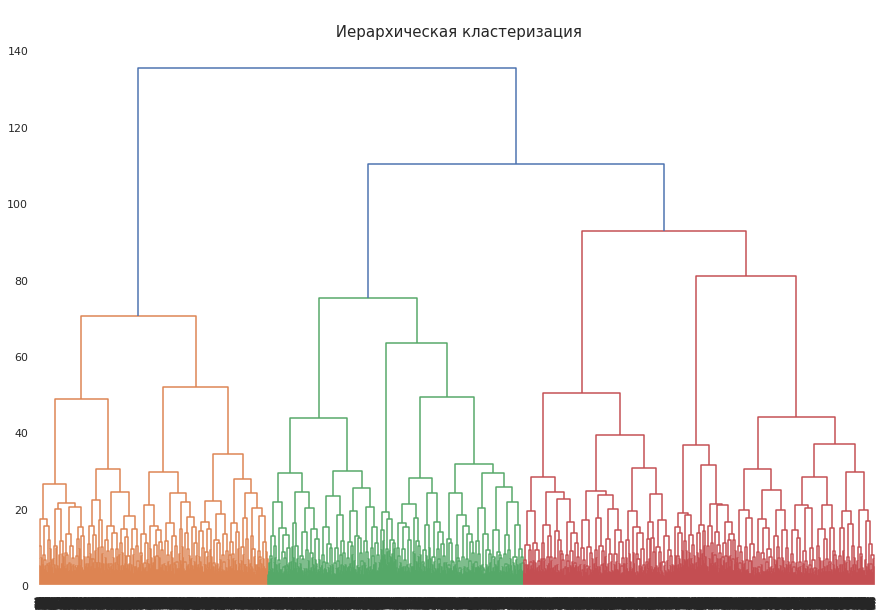

In [11]:
le = LabelEncoder()
le.fit(data['city'])
data['city_le']=le.transform(data['city'])
le.fit(data['gender'])
data['gender_le']=le.transform(data['gender'])


X = data.drop(['churn'], axis = 1)
X_1 = X.drop(['city'], axis = 1)
X_2 = X_1.drop(['gender'], axis = 1)
X_3 = X_2.drop(['age_group'], axis = 1)
X_4 = X_3.drop(['salary_group'], axis = 1)
X_5 = X_4.drop(['balance'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X_5)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

km = KMeans(n_clusters = 3, random_state = 0)
labels = km.fit_predict(X_st)
data['cluster_km'] = labels

Выделились 3 кластера.

### Средние значения и процент оттока по кластерам.

In [12]:
data.groupby('cluster_km').mean()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_le,gender_le
cluster_km,,,,,,,,,,,,
0,"15,735,504.33",651.31,38.16,5.09,"120,577.51",2.09,0.99,0.53,"100,449.41",0.13,1.26,0.55
1,"15,730,450.43",649.18,39.55,5.02,"119,668.75",1.00,1.00,0.50,"99,075.12",0.28,1.23,0.55
2,"15,735,437.77",651.24,39.07,4.91,"119,458.49",1.51,0.00,0.52,"100,902.43",0.20,1.25,0.54


Описание кластеров:

 Кластер 0:
 
 1.Самый низкий процент оттока - 13%.
 
 2.Самые высокие баллы кредитного скоринга.
 
 3.Самый низкий средний возраст клиента.
 
 4.Самое большое среднее количество объектов в собственности.
 
 5.Самый высокий средний баланс на счету.
 
 6.Самое высокое среднее количество используемых продуктов.
 
 7.Есть клиенты не владеющие кредитными картами.
 
 8.Самая высокая степень активности.
 
 9.Уровень средней з/п выше кластера1, но ниже кластера2.
 
 Кластер1:
 
 1.Самый высокий процент оттока клиентов - 28%
 
 2.Самый высокий средний возраст клиентов.
 
 3.Все клиенты в кластере имеют кредитные карты.
 
 4.Все остальные признаки имеют самые низкие показатели.
 
 Кластер2:
 
 1.Процент оттока - 20%.
 
 2.Клиенты в этом кластере не имеют кредитных карт.
 
 3.Всё остальные показатели меньше, чем в кластере0, но больше чем в кластере1.

 

### Распределения признаков для кластеров

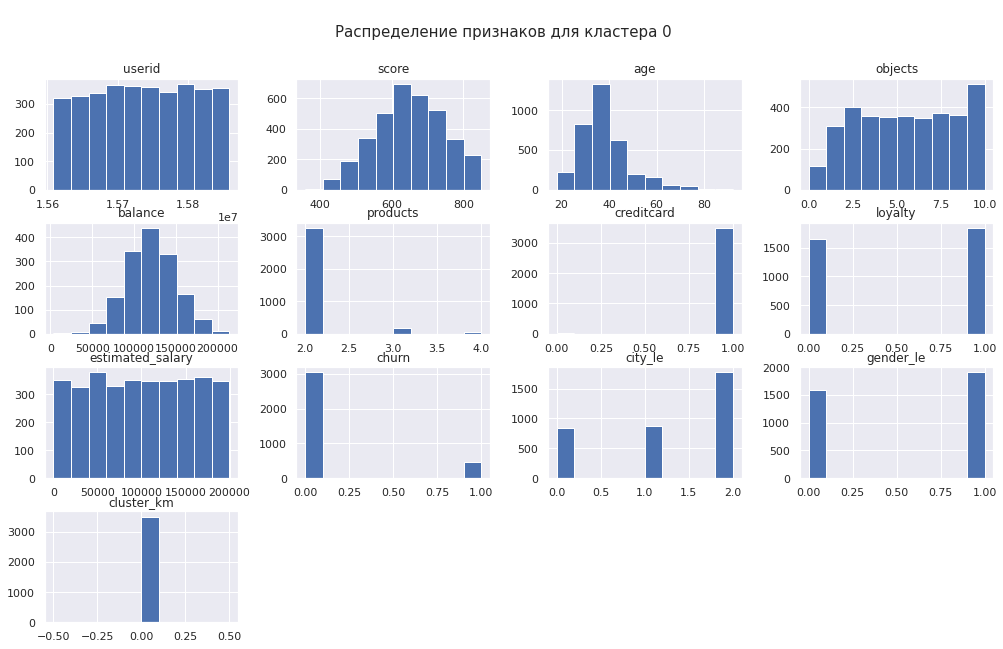

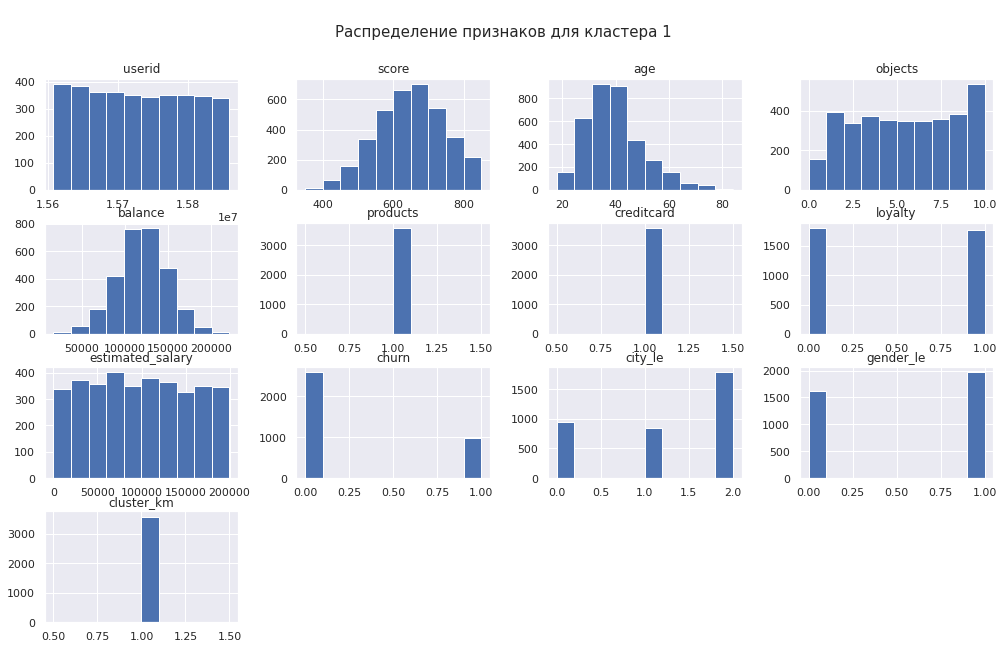

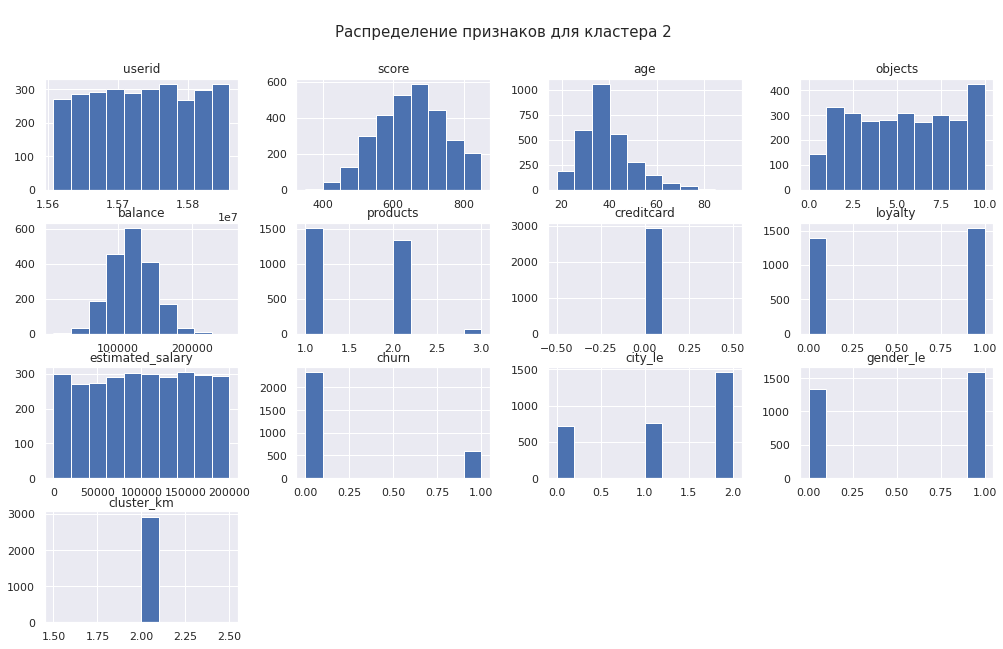

In [13]:
for value in [0, 1, 2]:
  data[data['cluster_km']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

## Портрет клиентов банка склонных к оттоку.

Ярко выраженного признака для оттока нет, но можно проследить некоторые тенденции:

1. В Ростове Великом наибольший процент оттока клиентов.

2. В процентном соотношении женщины уходят больше.

3. По возрасту это люди чаще вмего 45 - 65 лет.

4. Не высокий балл кредитного скоринга.

5. Чаще всего пользуется не более чем одним продуктом банка.

6. Имеет не высокую активность.

## Вывод и рекомендации:



**Выводы по имеющимся данным:**



    Средний балл кредитного скоринга - 650

    Средний возраст клиентов - 39 лет

    Среднее количество объектов в собствености - 5

    Средний баланс на счетах - 119,827

    Среднее количество продуктов, которыми пользуются клиенты - 1,5

    Порядка 70% пользуются кредитными картами

    Активность клиентов порядка 50%

    Средняя зарплата - 100,090

    Доля оттка - 20%



**Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:**



    У клиентов из оттока баллы кредитного скоринга чуть ниже

    У клиентов из оттока средний возраст выше

    У клиентов из оттока количество объектов в собствености меньше

    Баланс на счету почти не отличается

    Количество продуктов, которыми пользуются клиенты почти не отличается

    Процент пользования кредитными картами одинаковый

    У клиентов из оттока активность ниже

    У клиентов из оттока средний уровень зарплаты чуть выше



**Выводы по проверке гипотез:**

    Отсутствуют статистически значимые различия средних значений доходов клиентов, которые остались и теми кто ушёл.

    Есть статистически значимые различия средних значений баллов кредитного скоринга клиентов, которые остались и теми кто ушёл

**Разбили всех клиентов на 3 группы.**

 Кластер 0:

1.Самый низкий процент оттока - 13%.

2.Самые высокие баллы кредитного скоринга.

3.Самый низкий средний возраст клиента.

4.Самое большое среднее количество объектов в собственности.

5.Самый высокий средний баланс на счету.

6.Самое высокое среднее количество используемых продуктов.

7.Есть клиенты не владеющие кредитными картами.

8.Самая высокая степень активности.

9.Уровень средней з/п выше кластера1, но ниже кластера2.

Кластер1:

1.Самый высокий процент оттока клиентов - 28%

2.Самый высокий средний возраст клиентов.

3.Все клиенты в кластере имеют кредитные карты.

4.Все остальные признаки имеют самые низкие показатели.

Кластер2:

1.Процент оттока - 20%.

2.Клиенты в этом кластере не имеют кредитных карт.

3.Всё остальные показатели меньше, чем в кластере0, но больше чем в кластере1.

**Вывод по клиентам склонным к оттоку:**

Ярко выраженного признака для оттока нет, но можно проследить некоторые тенденции:

    В Ростове Великом наибольший процент оттока клиентов.

    В процентном соотношении женщины уходят больше.

    По возрасту это люди чаще вмего 45 - 65 лет.

    Не высокий балл кредитного скоринга.

    Чаще всего пользуется не более чем одним продуктом банка.

    Имеет не высокую активность.



**Рекомендации:**

Менеджерам банка больше обратить внимание на клиентов подходящих под ппортрет клиентов склоных к оттоку.

Возможно провести маркетинговую акцию по привлечению данных клиентов к увелечению пользования продуктами банка.

Провести анализ ситуации по клиентам в Ростове Великом.И провести дополнительное обучение менеджеров банка.

Провести разработку продуктов банка, которые будут болльше пртвлекать женщин и клиентов в возросте 45-65 лет.
